In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,id,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price (Millions)
0,127,7160,3,1,1,yes,no,yes,no,no,2,yes,unfurnished,5.880
1,364,3584,2,1,1,yes,no,no,yes,no,0,no,semi-furnished,3.710
2,371,4280,2,1,1,yes,no,no,no,yes,2,no,semi-furnished,3.640
3,32,7000,3,1,4,yes,no,no,no,yes,2,no,semi-furnished,8.400
4,114,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished,6.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,72,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished,6.755
377,107,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished,6.160
378,271,4500,3,2,3,yes,no,no,yes,no,1,no,furnished,4.340
379,436,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished,3.290


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                381 non-null    int64  
 1   area              381 non-null    int64  
 2   bedrooms          381 non-null    int64  
 3   bathrooms         381 non-null    int64  
 4   stories           381 non-null    int64  
 5   mainroad          381 non-null    object 
 6   guestroom         381 non-null    object 
 7   basement          381 non-null    object 
 8   hotwaterheating   381 non-null    object 
 9   airconditioning   381 non-null    object 
 10  parking           381 non-null    int64  
 11  prefarea          381 non-null    object 
 12  furnishingstatus  381 non-null    object 
 13  price (Millions)  381 non-null    float64
dtypes: float64(1), int64(6), object(7)
memory usage: 41.8+ KB


In [ ]:
train_df.describe()

,id,area,bedrooms,bathrooms,stories,parking,price (Millions)
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,270.627297,5128.401575,2.958005,1.262467,1.782152,0.669291,4.762406
std,152.114457,2177.317846,0.752763,0.475044,0.862857,0.837180,1.774777
min,2.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000
25%,140.000000,3600.000000,2.000000,1.000000,1.000000,0.000000,3.500000
50%,269.000000,4500.000000,3.000000,1.000000,2.000000,0.000000,4.382000
75%,403.000000,6325.000000,3.000000,1.000000,2.000000,1.000000,5.740000
max,543.000000,16200.000000,6.000000,4.000000,4.000000,3.000000,12.250000


In [ ]:
train_df.isnull().sum()

0

In [ ]:
train_df.duplicated().sum()

0

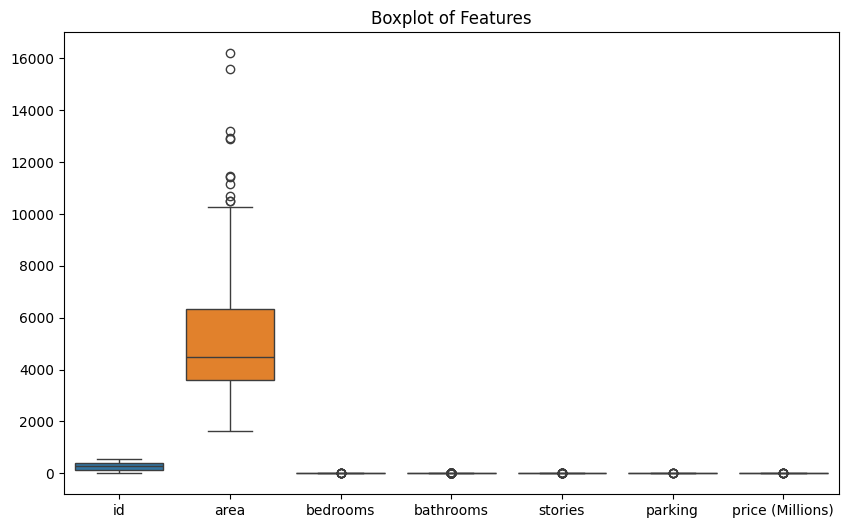

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df)
plt.title("Boxplot of Features")
plt.show()

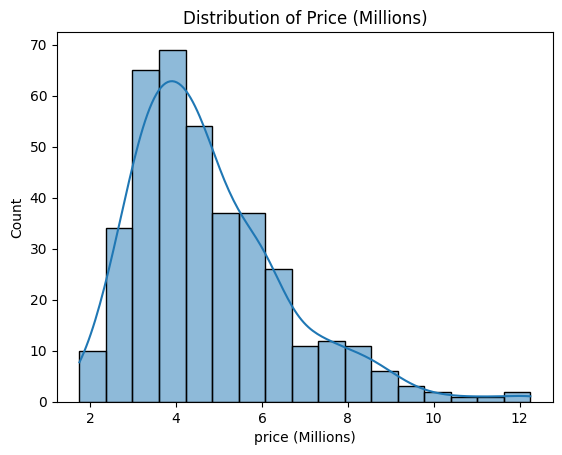

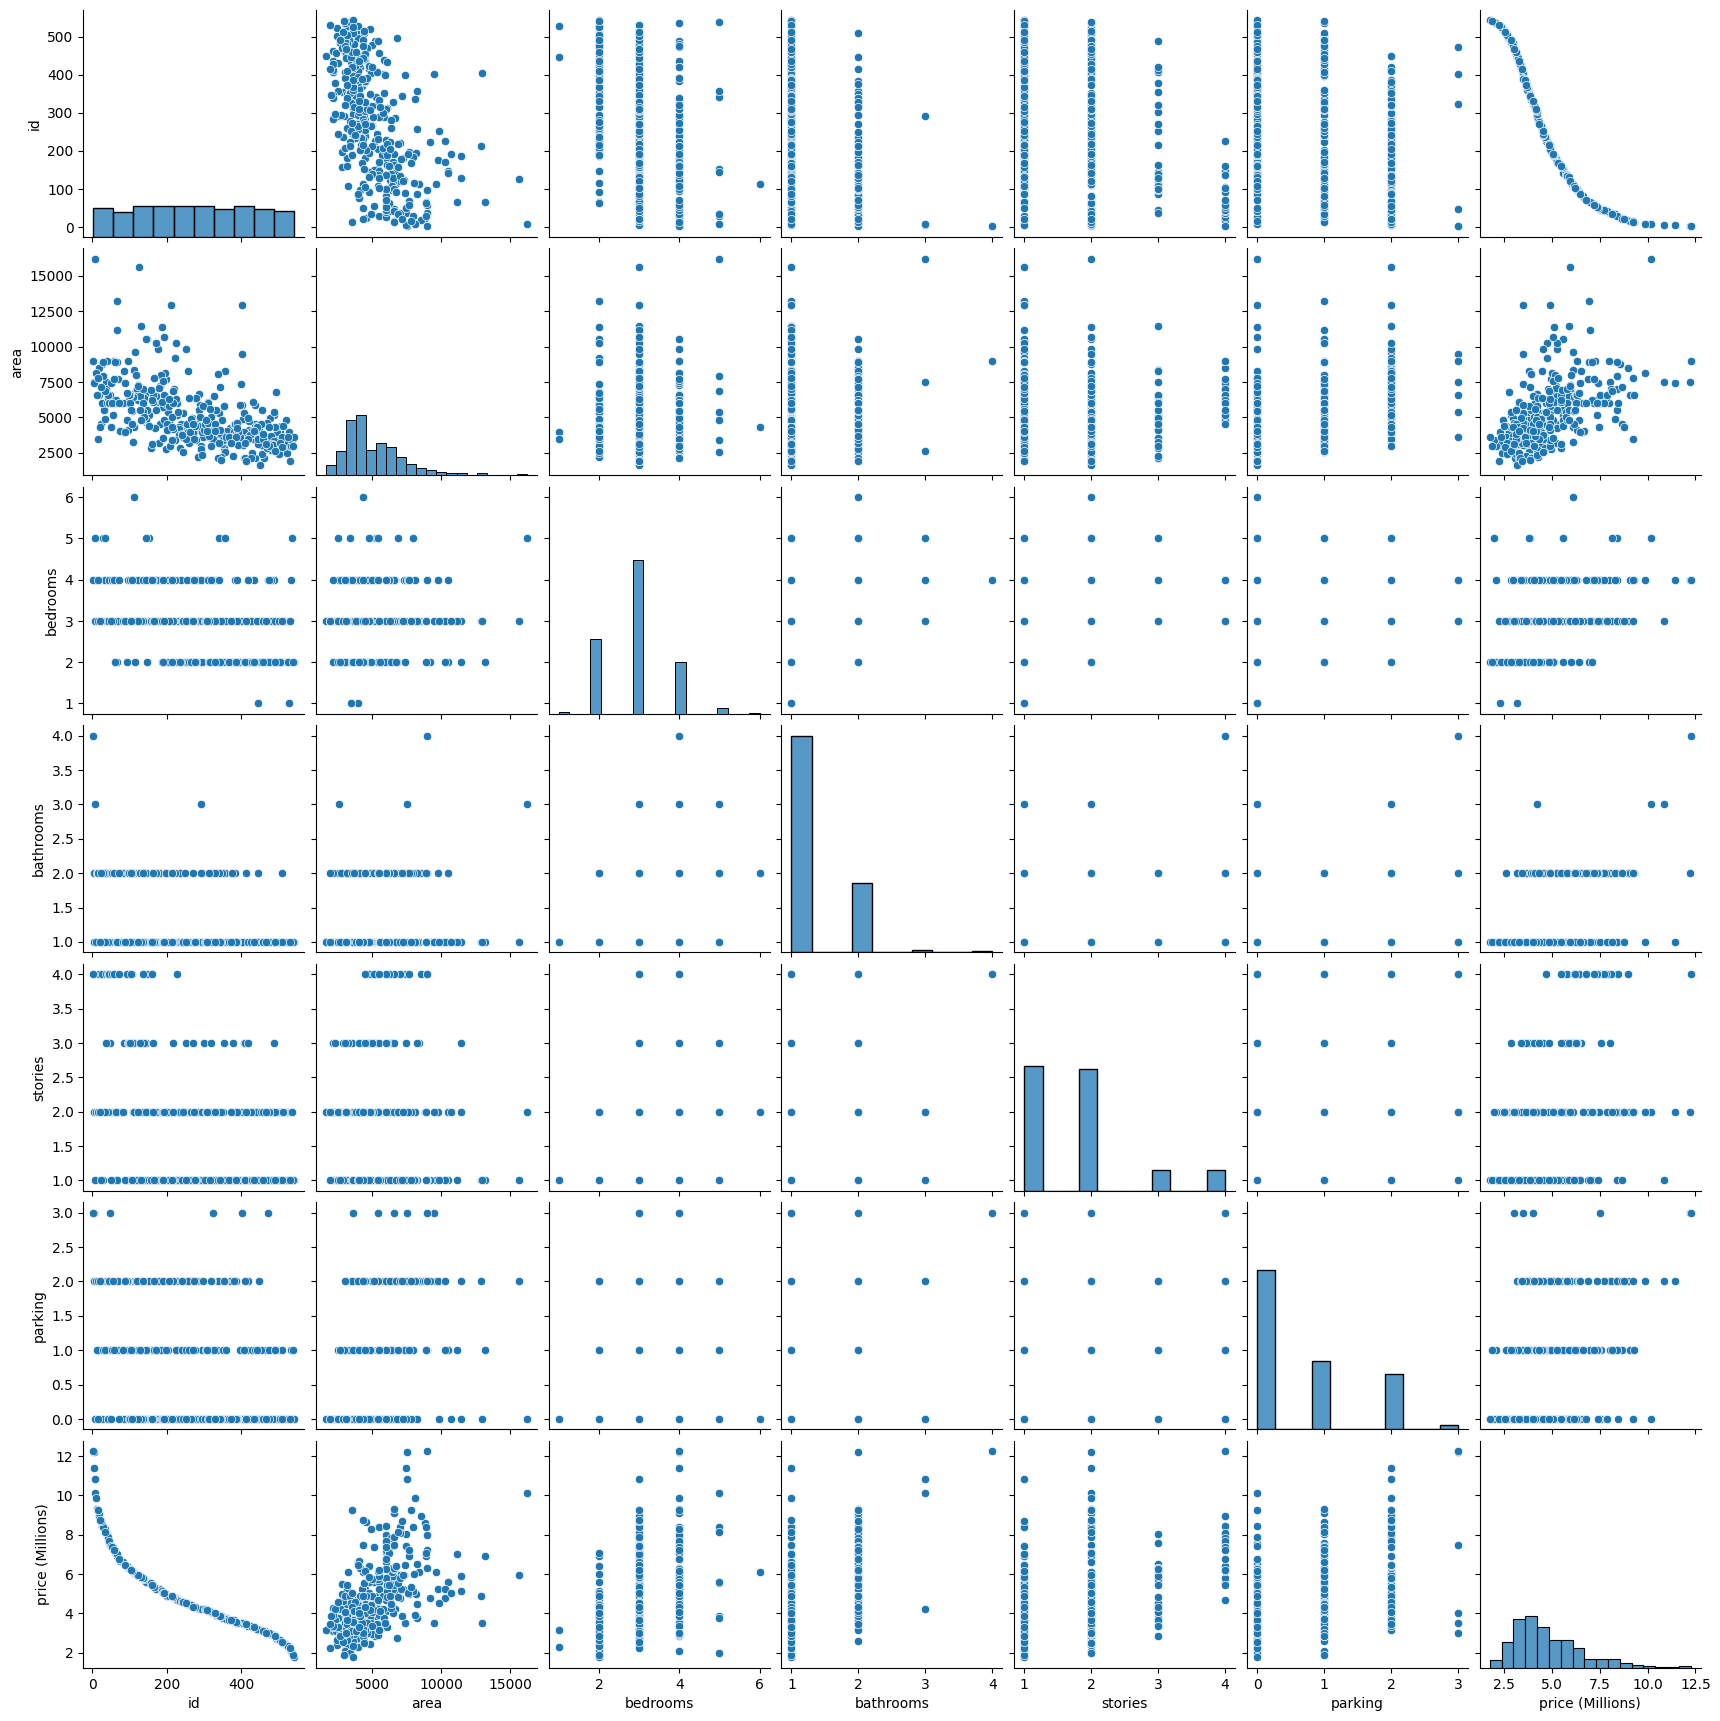

In [ ]:
sns.histplot(train_df['price (Millions)'], kde=True)
plt.title("Distribution of Price (Millions)")
plt.show()


sns.pairplot(train_df)
plt.show()

In [ ]:
X_train = train_df.drop('price (Millions)', axis=1)
y_train = train_df['price (Millions)']

The resone why i wanted to drob all the object column is because they are not numeric features because the ML modle only works in numeric features

In [ ]:
X_train=X_train.drop(X_train.select_dtypes(include=['object']), axis=1)

In [ ]:
linear=LinearRegression()

parmas={
    'fit_intercept':[True,False],
    'copy_X':[True,False],
    'positive':[True,False]
}

In [ ]:
grid_search = GridSearchCV(linear, parmas,scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Score: -0.3883572730606354


In [ ]:
test_df = pd.read_csv('test.csv')
X_test = test_df.drop(test_df.select_dtypes(include=['object']), axis=1)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
submission_df = pd.DataFrame({
    'id': X_test['id'],
    'price in (Millions)': y_pred
})
submission_df.to_csv('submission_linear.csv', index=False)

In [ ]:
degrees=[1,2,3,4,5]
reults=[]
for degree in degrees:
    poly=PolynomialFeatures(degree=degree)
    X_train_poly=poly.fit_transform(X_train)
    poly_model=LinearRegression()
    poly_model.fit(X_train_poly,y_train)
    y_pred_poly=poly_model.predict(X_train_poly)
    mse=mean_squared_error(y_train,y_pred_poly)
    print(f"Degree {degree} MSE: {mse}")
    reults.append((degree,mse))


Degree 1 MSE: 0.34929326785854214
Degree 2 MSE: 0.12374307435681468
Degree 3 MSE: 0.018949787967049794
Degree 4 MSE: 0.010958461780662314
Degree 5 MSE: 0.03189289544569294


# A) Yes it does
# B) Degree 5  MSE: 0.03189289544569294

In [ ]:
degree=4
poly=PolynomialFeatures(degree=degree)
X_train_poly=poly.fit_transform(X_train)
poly_model=LinearRegression()
poly_model.fit(X_train_poly,y_train)

y_pred_poly=poly_model.predict(X_train_poly)
mse=mean_squared_error(y_train,y_pred_poly)
print(f"Degree {degree} MSE: {mse}")

Degree 4 MSE: 0.010958461780662314


In [ ]:
X_test_poly = poly.transform(X_test)  # Use the best polynomial degree

# Predict on the test set
y_test_pred = poly_model.predict(X_test_poly)

# Create the submission file
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'price': y_test_pred
})

# Save the submission file
submission_df.to_csv('submission_poly.csv', index=False)